In [129]:
import pandas as pd
import numpy as np

file1=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_01_DEMO.csv')
file2=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_02_PDDE.csv')
file3=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_03_COP_U.csv')
file4=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_04_PD_CLAC.csv')
file5=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_05_BR.csv')
file6=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_06_LPAY.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24832\1570498048.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  file2=pd.read_csv('C:\\LPOINT_BIG_COMP\\LPOINT_BIG_COMP_02_PDDE.csv')


In [130]:
#엘페이 이용자들의 제휴사파악하기
file6.cop_c.unique()
file6['lpoint']=1

In [153]:
file6

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,lpoint
0,M629656521,210803210311226,A03,1,20210803,21,10900,1
1,M216016456,210803130167542,L01,2,20210803,13,6860,1
2,M205142844,210803140275112,A02,1,20210803,14,9000,1
3,M737010483,210803040637594,A06,2,20210803,4,36740,1
4,M707775545,210803140675502,A06,2,20210803,14,138500,1
...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,1
353180,M470112503,210104210652271,A06,2,20210104,21,6440,1
353181,M748878049,210119200278240,A02,1,20210119,20,17600,1
353182,M748878049,210119180267206,A02,1,20210119,18,12400,1


In [132]:
#2,3번데이터들에 있어서 6번데이터의 제휴사와 같은것들만 추출
file23=pd.concat([file2,file3])
file23_cop=file23[file23['cop_c'].isin(['A03', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04',
       'D01', 'A05', 'C02', 'E01', 'B01'])]
file23=file23_cop.drop(['br_c','pd_c','buy_ct','vst_dt'],axis=1)


In [133]:
#6번데이터는 수량이 없고 총금액만 있으므로 2,3번데이터들도 총금액을 만들어줌
a=file23.groupby(by=['rct_no','cust','chnl_dv','de_hr','de_dt','cop_c']).sum()
a.reset_index()

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0
...,...,...,...,...,...,...,...
1514888,E06052115831,M816318679,2,22,20211231,A06,50000.0
1514889,E06052116037,M816318679,2,22,20211231,A06,30000.0
1514890,E06052117103,M182645944,2,23,20211231,A06,289000.0
1514891,E06052118403,M533286446,2,23,20211231,A06,1000000.0


In [134]:
aa=a.reset_index()
aa['lpoint']=0

In [135]:
#23번데이터들에있어서 6번데이터만큼 추출함
#aaa=aa.sample(n=353184)


In [137]:
#엘페이 이용자들이 각각 반반씩 있는걸로 만듬
lpay_=pd.concat([aa,file6])
lpay_

,rct_no,cust,chnl_dv,de_hr,de_dt,cop_c,buy_am,lpoint
0,20122713C012328716,M495972460,2,13,20201227,C01,26000.0,0
1,20122900C013317930,M192531170,2,0,20201229,C01,10000.0,0
2,20122911C011862577,M039320884,2,11,20201229,C01,6500.0,0
3,20123009C012921880,M201983289,2,9,20201230,C01,24000.0,0
4,20123012C011060420,M205977381,2,12,20201230,C01,6500.0,0
...,...,...,...,...,...,...,...,...
353179,210125110644545,M470112503,2,11,20210125,A06,51800.0,1
353180,210104210652271,M470112503,2,21,20210104,A06,6440.0,1
353181,210119200278240,M748878049,1,20,20210119,A02,17600.0,1
353182,210119180267206,M748878049,1,18,20210119,A02,12400.0,1


In [138]:
#날짜형식으로 바꿔 월 추출
lpay_['de_dt']=lpay_['de_dt'].astype(str)
lpay_['de_dt'] = pd.to_datetime(lpay_['de_dt'])
lpay_['month'] =lpay_['de_dt'].dt.month

In [139]:
#나이대, 성별 라벨링해주기
lpay1=lpay_.merge(file1,on='cust',how='left')
_ages=[
    (lpay1['ages']=='20대')
    ,(lpay1['ages']=='30대')
    ,(lpay1['ages']=='40대')
    ,(lpay1['ages']=='50대')
    ,(lpay1['ages']=='60대')
    ,(lpay1['ages']=='70대')
]
choicelist=[2,3,4,5,6,7]
lpay1['ages'] = np.select(_ages, choicelist, default="xx")
_gender=[
    (lpay1['ma_fem_dv']=="남성"),
    (lpay1['ma_fem_dv']=='여성')
]
_choicelist=[1,2]
lpay1['ma_fem_dv'] = np.select(_gender, _choicelist, default="xx")

In [140]:
lpay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868077 entries, 0 to 1868076
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   rct_no     object        
 1   cust       object        
 2   chnl_dv    int64         
 3   de_hr      int64         
 4   de_dt      datetime64[ns]
 5   cop_c      object        
 6   buy_am     float64       
 7   lpoint     int64         
 8   month      int64         
 9   ma_fem_dv  object        
 10  ages       object        
 11  zon_hlv    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 185.3+ MB


In [141]:
#TYPE맞춰주기
lpay1[[ 'ma_fem_dv','ages']] =lpay1[['ma_fem_dv','ages']].apply(pd.to_numeric)


In [142]:
#지역분류
_zon=[
    (lpay1['zon_hlv']=='Z17')
    ,(lpay1['zon_hlv']=='Z04')
    ,(lpay1['zon_hlv']=='Z10')
    ,(lpay1['zon_hlv']=='Z09')
    ,(lpay1['zon_hlv']=='Z16')
    ,(lpay1['zon_hlv']=='Z07')
    ,(lpay1['zon_hlv']=='Z01')
    ,(lpay1['zon_hlv']=='Z05')
    ,(lpay1['zon_hlv']=='Z14')
    ,(lpay1['zon_hlv']=='Z13')
    ,(lpay1['zon_hlv']=='Z11')
    ,(lpay1['zon_hlv']=='Z08')
    ,(lpay1['zon_hlv']=='Z03')
    ,(lpay1['zon_hlv']=='Z06')
    ,(lpay1['zon_hlv']=='Z15')
    ,(lpay1['zon_hlv']=='Z02')
    ,(lpay1['zon_hlv']=='Z12')
]
list_1=[17,4,10,9,16,7,1,5,14,13,11,8,3,6,15,2,12]
lpay1['zon_hlv'] = np.select(_zon, list_1, default="xx")

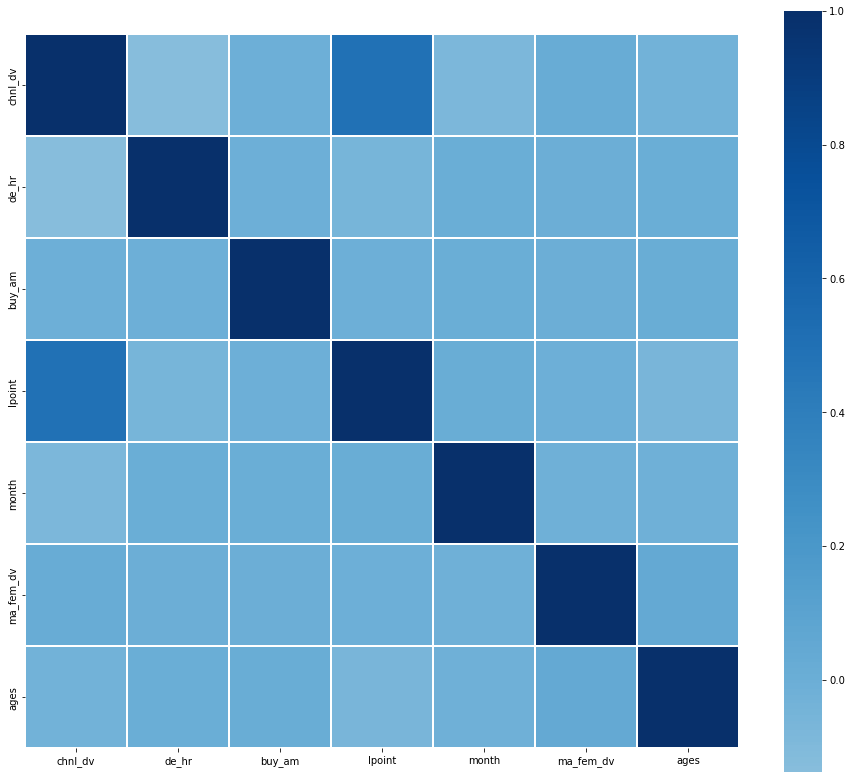

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = lpay1.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=1, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [144]:
lpay1.describe().T

,count,mean,std,min,25%,50%,75%,max
chnl_dv,1868077.0,1.179673,0.383915,1.0,1.0,1.0,1.0,2.0
de_hr,1868077.0,15.198368,4.030863,0.0,13.0,15.0,18.0,23.0
buy_am,1868077.0,68620.110194,416003.197464,1.0,7200.0,17530.0,46660.0,70092000.0
lpoint,1868077.0,0.189063,0.391559,0.0,0.0,0.0,0.0,1.0
month,1868077.0,6.479891,3.386903,1.0,4.0,6.0,9.0,12.0
ma_fem_dv,1868077.0,1.699456,0.458495,1.0,1.0,2.0,2.0,2.0
ages,1868077.0,3.912872,1.060486,2.0,3.0,4.0,5.0,7.0


In [145]:
buy_75=lpay1['buy_am'] < 47580
final=lpay1[buy_75]

In [146]:
from sklearn.linear_model import LogisticRegression

X=lpay1[['chnl_dv','ages','ma_fem_dv','month','de_hr','buy_am','zon_hlv']]
y=lpay1[['lpoint']]

In [147]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X,y)

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [149]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [150]:
print(model.score(test_features, test_labels))

0.8488458738383795


In [151]:
print(model.score(train_features, train_labels))

0.8487284957000322


In [152]:
print(model.coef_)

[[ 1.04315231 -0.17675522 -0.06444015  0.17250197  0.02762182 -0.01993496
   0.13534494]]
